<a href="https://colab.research.google.com/github/jeffowino/TPMAMA-ANALYTICS/blob/main/CUSTOMER_SEGMENTATION.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import pandas as pd
import numpy as np

In [ ]:
#from google.colab import drive
#drive.mount('/content/drive')

In [ ]:
kenya_cust=pd.read_csv("/content/drive/MyDrive/TOP UM MAMA/Kenya Customers.csv")
kenya_del=pd.read_csv("/content/drive/MyDrive/TOP UM MAMA/Kenya Deliveries.csv")
kenya_ord=pd.read_csv("/content/drive/MyDrive/TOP UM MAMA/Kenya Orders.csv")





/usr/local/lib/python3.7/dist-packages/IPython/core/interactiveshell.py:2882: DtypeWarning: Columns (20) have mixed types.Specify dtype option on import or set low_memory=False.
  exec(code_obj, self.user_global_ns, self.user_ns)


Merging in Kenya Datasets

In [ ]:
#merginf datasets
df=kenya_cust.merge(kenya_ord,on='Customer ID')



In [ ]:
df.rename(columns={'Order ID':'Order_ID'},inplace=True)
df.head(2)

,Customer ID,Last Used Platform,Is Blocked,Created At,Language,Outstanding Amount,Loyalty Points,Number of employees,Upload restuarant location,Order_ID,Order Status,Category Name,SKU,Customization Group,Customization Option,Quantity,Unit Price,Cost Price,Total Cost Price,Total Price,Order Total,Sub Total,Tax,Delivery Charge,Tip,Discount,Remaining Balance,Payment Method,Additional Charge,Taxable Amount,Transaction ID,Currency Symbol,Transaction Status,Promo Code,Merchant ID,Store Name,Pickup Address,Description,Distance (in km),Order Time,Pickup Time,Delivery Time,Ratings,Reviews,Merchant Earning,Commission Amount,Commission Payout Status,Order Preparation Time,Debt Amount,Redeemed Loyalty Points,Consumed Loyalty Points,Cancellation Reason,Flat Discount,Checkout Template Name,Checkout Template Value
0,3365019,WEB,0,2021-04-21T07:15:56.000Z,en,0,68,NaN,NaN,11155410,COMPLETED,Cooking Fat & Oil,KKCO0620,NaN,NaN,1,4320,4270,4270,4320,6470.0,6516,-,-,-,-,0,CASH,-,-,0,KSh,NaN,NaN,893555,Topup Mama,"Kilimani, Nairobi, Kenya",NaN,20.09,2022-02-11T20:02:56.000Z,2022-02-11T20:00:32.000Z,2022-02-12T08:00:00.000Z,NaN,NaN,NaN,NaN,NaN,0,-,46,65,NaN,0,-,-
1,3365019,WEB,0,2021-04-21T07:15:56.000Z,en,0,68,NaN,NaN,11155410,COMPLETED,Flour & Sugar,KKFS0222,NaN,NaN,1,1670,1630,1630,1670,6470.0,6516,-,-,-,-,0,CASH,-,-,0,KSh,NaN,NaN,893555,Topup Mama,"Kilimani, Nairobi, Kenya",NaN,20.09,2022-02-11T20:02:56.000Z,2022-02-11T20:00:32.000Z,2022-02-12T08:00:00.000Z,NaN,NaN,NaN,NaN,NaN,0,-,46,65,NaN,0,-,-


In [ ]:
#Writing the unique identifier to be the same since some columns in the delivery doe not match
kenya_del['Order_ID']=kenya_del['Order_ID'].str.rsplit('-', 0).str.get(1)

kenya_del.head(2)


,Task_ID,Order_ID,Relationship,Team_Name,Task_Type,Notes,Agent_ID,Agent_Name,Distance(m),Total_Time_Taken(min),Pick_up_From,Start_Before,Complete_Before,Completion_Time,Task_Status,Ref_Images,Rating,Review,Latitude,Longitude,Tags,Promo_Applied,Custom_Template_ID,Task_Details_QTY,Task_Details_AMOUNT,Special_Instructions,Tip,Delivery_Charges,Discount,Subtotal,Payment_Type,Task_Category,Earning,Pricing,Unnamed: 34,Unnamed: 35
0,368110390,"11265216,0",3.681104e+29,Default Team,Delivery,NaN,-,-,-,-,Topup Mama,17 Feb 2022 04:48:44 pm,18 Feb 2022 11:00:00 am,-,Unassigned,-,0,-,-1.2664883,36.834632,NaN,-,Order_Details,1,KSh 4400.00,-,-,-,-,-,-,-,-,-,NaN,NaN
1,368110390,"11265216,0",3.681104e+29,Default Team,Delivery,NaN,-,-,-,-,Topup Mama,17 Feb 2022 04:48:44 pm,18 Feb 2022 11:00:00 am,-,Unassigned,-,0,-,-1.2664883,36.834632,NaN,-,Order_Details,12,KSh 300.00,-,KSh 0.00,KSh 0.00,KSh 0.00,4700,CASH,-,-,-,NaN,NaN


In [ ]:

kenya_del['Order_ID']=kenya_del['Order_ID'].str.rsplit(',', 0).str.get(0)

kenya_del.head(2)

,Task_ID,Order_ID,Relationship,Team_Name,Task_Type,Notes,Agent_ID,Agent_Name,Distance(m),Total_Time_Taken(min),Pick_up_From,Start_Before,Complete_Before,Completion_Time,Task_Status,Ref_Images,Rating,Review,Latitude,Longitude,Tags,Promo_Applied,Custom_Template_ID,Task_Details_QTY,Task_Details_AMOUNT,Special_Instructions,Tip,Delivery_Charges,Discount,Subtotal,Payment_Type,Task_Category,Earning,Pricing,Unnamed: 34,Unnamed: 35
0,368110390,11265216,3.681104e+29,Default Team,Delivery,NaN,-,-,-,-,Topup Mama,17 Feb 2022 04:48:44 pm,18 Feb 2022 11:00:00 am,-,Unassigned,-,0,-,-1.2664883,36.834632,NaN,-,Order_Details,1,KSh 4400.00,-,-,-,-,-,-,-,-,-,NaN,NaN
1,368110390,11265216,3.681104e+29,Default Team,Delivery,NaN,-,-,-,-,Topup Mama,17 Feb 2022 04:48:44 pm,18 Feb 2022 11:00:00 am,-,Unassigned,-,0,-,-1.2664883,36.834632,NaN,-,Order_Details,12,KSh 300.00,-,KSh 0.00,KSh 0.00,KSh 0.00,4700,CASH,-,-,-,NaN,NaN


In [ ]:
kenya_del.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 44983 entries, 0 to 44982
Data columns (total 36 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   Task_ID                44983 non-null  int64  
 1   Order_ID               44983 non-null  object 
 2   Relationship           44983 non-null  float64
 3   Team_Name              44983 non-null  object 
 4   Task_Type              44983 non-null  object 
 5   Notes                  13873 non-null  object 
 6   Agent_ID               44983 non-null  object 
 7   Agent_Name             44983 non-null  object 
 8   Distance(m)            44983 non-null  object 
 9   Total_Time_Taken(min)  44983 non-null  object 
 10  Pick_up_From           44983 non-null  object 
 11  Start_Before           44983 non-null  object 
 12  Complete_Before        44983 non-null  object 
 13  Completion_Time        44983 non-null  object 
 14  Task_Status            44983 non-null  object 
 15  Re

In [ ]:
# deliver['Order_ID']=deliver['Order_ID'].astype(str).astype(int)
kenya_del['Order_ID']=kenya_del['Order_ID'].apply(pd.to_numeric)

In [ ]:
data=df.merge(kenya_del,on='Order_ID')

data.head(2)

,Customer ID,Last Used Platform,Is Blocked,Created At,Language,Outstanding Amount,Loyalty Points,Number of employees,Upload restuarant location,Order_ID,Order Status,Category Name,SKU,Customization Group,Customization Option,Quantity,Unit Price,Cost Price,Total Cost Price,Total Price,Order Total,Sub Total,Tax,Delivery Charge,Tip_x,Discount_x,Remaining Balance,Payment Method,Additional Charge,Taxable Amount,Transaction ID,Currency Symbol,Transaction Status,Promo Code,Merchant ID,Store Name,Pickup Address,Description,Distance (in km),Order Time,...,Consumed Loyalty Points,Cancellation Reason,Flat Discount,Checkout Template Name,Checkout Template Value,Task_ID,Relationship,Team_Name,Task_Type,Notes,Agent_ID,Agent_Name,Distance(m),Total_Time_Taken(min),Pick_up_From,Start_Before,Complete_Before,Completion_Time,Task_Status,Ref_Images,Rating,Review,Latitude,Longitude,Tags,Promo_Applied,Custom_Template_ID,Task_Details_QTY,Task_Details_AMOUNT,Special_Instructions,Tip_y,Delivery_Charges,Discount_y,Subtotal,Payment_Type,Task_Category,Earning,Pricing,Unnamed: 34,Unnamed: 35
0,3365019,WEB,0,2021-04-21T07:15:56.000Z,en,0,68,NaN,NaN,11155410,COMPLETED,Cooking Fat & Oil,KKCO0620,NaN,NaN,1,4320,4270,4270,4320,6470.0,6516,-,-,-,-,0,CASH,-,-,0,KSh,NaN,NaN,893555,Topup Mama,"Kilimani, Nairobi, Kenya",NaN,20.09,2022-02-11T20:02:56.000Z,...,65,NaN,0,-,-,365714001,3.657140e+29,Default Team,Delivery,NaN,1092535,Dominic Kipkemoi,0,13.35,Topup Mama,11 Feb 2022 08:00:32 pm,12 Feb 2022 08:00:00 am,12 Feb 2022 07:38:44 am,Completed,-,0,-,-1.1496162,36.947408,NaN,-,Order_Details,1,KSh 4320.00,-,-,-,-,-,-,-,0,0,NaN,NaN
1,3365019,WEB,0,2021-04-21T07:15:56.000Z,en,0,68,NaN,NaN,11155410,COMPLETED,Cooking Fat & Oil,KKCO0620,NaN,NaN,1,4320,4270,4270,4320,6470.0,6516,-,-,-,-,0,CASH,-,-,0,KSh,NaN,NaN,893555,Topup Mama,"Kilimani, Nairobi, Kenya",NaN,20.09,2022-02-11T20:02:56.000Z,...,65,NaN,0,-,-,365714001,3.657140e+29,Default Team,Delivery,NaN,1092535,Dominic Kipkemoi,0,13.35,Topup Mama,11 Feb 2022 08:00:32 pm,12 Feb 2022 08:00:00 am,12 Feb 2022 07:38:44 am,Completed,-,0,-,-1.1496162,36.947408,NaN,-,Order_Details,1,KSh 1670.00,-,-,-,-,-,-,-,0,0,NaN,NaN


Nigeria Data

In [ ]:
Nigeria_cust=pd.read_csv("/content/drive/MyDrive/TOP UM MAMA/Nigeria Customers.csv")
Nigeria_del=pd.read_csv("/content/drive/MyDrive/TOP UM MAMA/Nigeria Deliveries.csv")
Nigeria_ord=pd.read_csv("/content/drive/MyDrive/TOP UM MAMA/Nigeria Orders.csv")


In [ ]:
#merginf datasets
df2=Nigeria_cust.merge(Nigeria_ord,on='Customer ID')


In [ ]:
df2.rename(columns={'Order ID':'Order_ID'},inplace=True)
df2.head(2)

,Customer ID,Last Used Platform,Is Blocked,Created At,Language,Outstanding Amount,Loyalty Points,Number of Employees,Order_ID,Order Status,Category Name,SKU,Customization Group,Customization Option,Quantity,Unit Price,Cost Price,Total Cost Price,Total Price,Order Total,Sub Total,Tax,Delivery Charge,Tip,Discount,Remaining Balance,Payment Method,Additional Charge,Taxable Amount,Transaction ID,Currency Symbol,Transaction Status,Promo Code,Merchant ID,Store Name,Pickup Address,Description,Distance (in km),Order Time,Pickup Time,Delivery Time,Ratings,Reviews,Merchant Earning,Commission Amount,Commission Payout Status,Order Preparation Time,Redeemed Loyalty Points,Consumed Loyalty Points,Cancellation Reason,Flat Discount,Checkout Template Name,Checkout Template Value
0,4069636,WEB,0,2021-08-07T12:08:27.000Z,en,0,1235,4.0,11167514,COMPLETED,Flour & Sugar,KNFS0001,NaN,NaN,2,20850,20370,40740,41700,41700.0,41700,-,-,-,-,0,CASH,-,-,0,₦,NaN,NaN,1048159,Topup Mama,-,NaN,11996.7,2022-02-12T09:43:21.000Z,2022-02-12T09:44:14.000Z,2022-02-12T15:00:00.000Z,NaN,NaN,NaN,NaN,NaN,0,-,83,NaN,0,-,-
1,4069636,WEB,0,2021-08-07T12:08:27.000Z,en,0,1235,4.0,11095740,COMPLETED,Flour & Sugar,KNFS0001,NaN,NaN,2,21000,20370,40740,42000,41600.0,42000,-,-,-,-,0,CASH,-,-,0,₦,NaN,NaN,1048159,Topup Mama,-,NaN,11996.7,2022-02-08T10:36:28.000Z,2022-02-08T10:37:26.000Z,2022-02-08T15:00:00.000Z,NaN,NaN,NaN,NaN,NaN,0,80,84,NaN,0,-,-


In [ ]:
#Writing the unique identifier to be the same since some columns in the delivery doe not match
Nigeria_del['Order_ID']=Nigeria_del['Order_ID'].str.rsplit('-', 0).str.get(1)

Nigeria_del.head(2)


,Task_ID,Order_ID,Relationship,Team_Name,Task_Type,Notes,Agent_ID,Distance(m),Total_Time_Taken(min),Pick_up_From,Start_Before,Complete_Before,Completion_Time,Task_Status,Ref_Images,Rating,Review,Latitude,Longitude,Tags,Promo_Applied,Custom_Template_ID,Task_Details_QTY,Task_Details_AMOUNT,Special_Instructions,Tip,Delivery_Charges,Discount,Subtotal,Payment_Type,Task_Category,Earning,Pricing
0,368032956,"11262518,0",3.680330e+29,Default Team,Delivery,NaN,1150142,-,-,Topup Mama,17 Feb 2022 12:04:02 pm,17 Feb 2022 02:30:00 pm,-,Assigned,-,0,-,6.544412,3.401738,NaN,-,Order_Details,5,₦ 104250.00,-,-,-,-,-,-,-,-,-
1,368032956,"11262518,0",3.680330e+29,Default Team,Delivery,NaN,1150142,-,-,Topup Mama,17 Feb 2022 12:04:02 pm,17 Feb 2022 02:30:00 pm,-,Assigned,-,0,-,6.544412,3.401738,NaN,-,Order_Details,1,₦ 325.00,-,₦ 0.00,₦ 0.00,₦ 0.00,104575,CASH,-,-,-


In [ ]:
Nigeria_del['Order_ID']=Nigeria_del['Order_ID'].str.rsplit(',', 0).str.get(0)

Nigeria_del.head(2)

,Task_ID,Order_ID,Relationship,Team_Name,Task_Type,Notes,Agent_ID,Distance(m),Total_Time_Taken(min),Pick_up_From,Start_Before,Complete_Before,Completion_Time,Task_Status,Ref_Images,Rating,Review,Latitude,Longitude,Tags,Promo_Applied,Custom_Template_ID,Task_Details_QTY,Task_Details_AMOUNT,Special_Instructions,Tip,Delivery_Charges,Discount,Subtotal,Payment_Type,Task_Category,Earning,Pricing
0,368032956,11262518,3.680330e+29,Default Team,Delivery,NaN,1150142,-,-,Topup Mama,17 Feb 2022 12:04:02 pm,17 Feb 2022 02:30:00 pm,-,Assigned,-,0,-,6.544412,3.401738,NaN,-,Order_Details,5,₦ 104250.00,-,-,-,-,-,-,-,-,-
1,368032956,11262518,3.680330e+29,Default Team,Delivery,NaN,1150142,-,-,Topup Mama,17 Feb 2022 12:04:02 pm,17 Feb 2022 02:30:00 pm,-,Assigned,-,0,-,6.544412,3.401738,NaN,-,Order_Details,1,₦ 325.00,-,₦ 0.00,₦ 0.00,₦ 0.00,104575,CASH,-,-,-


In [ ]:
# deliver['Order_ID']=deliver['Order_ID'].astype(str).astype(int)
Nigeria_del['Order_ID']=Nigeria_del['Order_ID'].apply(pd.to_numeric)

In [ ]:
data2=df2.merge(Nigeria_del,on='Order_ID')

data2.head(2)

,Customer ID,Last Used Platform,Is Blocked,Created At,Language,Outstanding Amount,Loyalty Points,Number of Employees,Order_ID,Order Status,Category Name,SKU,Customization Group,Customization Option,Quantity,Unit Price,Cost Price,Total Cost Price,Total Price,Order Total,Sub Total,Tax,Delivery Charge,Tip_x,Discount_x,Remaining Balance,Payment Method,Additional Charge,Taxable Amount,Transaction ID,Currency Symbol,Transaction Status,Promo Code,Merchant ID,Store Name,Pickup Address,Description,Distance (in km),Order Time,Pickup Time,...,Commission Payout Status,Order Preparation Time,Redeemed Loyalty Points,Consumed Loyalty Points,Cancellation Reason,Flat Discount,Checkout Template Name,Checkout Template Value,Task_ID,Relationship,Team_Name,Task_Type,Notes,Agent_ID,Distance(m),Total_Time_Taken(min),Pick_up_From,Start_Before,Complete_Before,Completion_Time,Task_Status,Ref_Images,Rating,Review,Latitude,Longitude,Tags,Promo_Applied,Custom_Template_ID,Task_Details_QTY,Task_Details_AMOUNT,Special_Instructions,Tip_y,Delivery_Charges,Discount_y,Subtotal,Payment_Type,Task_Category,Earning,Pricing
0,4069636,WEB,0,2021-08-07T12:08:27.000Z,en,0,1235,4.0,11167514,COMPLETED,Flour & Sugar,KNFS0001,NaN,NaN,2,20850,20370,40740,41700,41700.0,41700,-,-,-,-,0,CASH,-,-,0,₦,NaN,NaN,1048159,Topup Mama,-,NaN,11996.7,2022-02-12T09:43:21.000Z,2022-02-12T09:44:14.000Z,...,NaN,0,-,83,NaN,0,-,-,365944018,3.659440e+29,Default Team,Delivery,NaN,1106729,3420,80.82,Topup Mama,12 Feb 2022 09:44:14 am,12 Feb 2022 03:00:00 pm,12 Feb 2022 01:39:08 pm,Completed,-,0,-,6.53291,3.395988,NaN,-,Order_Details,2,₦ 41700.00,-,₦ 0.00,₦ 0.00,₦ 0.00,41700,CASH,-,-,-
1,4069636,WEB,0,2021-08-07T12:08:27.000Z,en,0,1235,4.0,11095740,COMPLETED,Flour & Sugar,KNFS0001,NaN,NaN,2,21000,20370,40740,42000,41600.0,42000,-,-,-,-,0,CASH,-,-,0,₦,NaN,NaN,1048159,Topup Mama,-,NaN,11996.7,2022-02-08T10:36:28.000Z,2022-02-08T10:37:26.000Z,...,NaN,0,80,84,NaN,0,-,-,364425920,3.644259e+29,Default Team,Delivery,NaN,1233213,11250,97.95,Topup Mama,08 Feb 2022 10:37:26 am,08 Feb 2022 03:00:00 pm,08 Feb 2022 04:44:33 pm,Completed,-,0,-,6.53291,3.395988,NaN,-,Order_Details,2,₦ 42000.00,-,₦ 0.00,₦ 0.00,₦ 400.00,41600,CASH,-,-,-


 **MERGING THE TWO DATASETS** 

In [ ]:
#row-bind two DataFrames
combined = pd.concat([data, data2])

In [ ]:
combined.isna().sum()

Customer ID                0
Last Used Platform         0
Is Blocked                 0
Created At                 0
Language                   0
                       ...  
Earning                    0
Pricing                    0
Unnamed: 34            68443
Unnamed: 35            68905
Number of Employees    66500
Length: 91, dtype: int64

In [ ]:
combined['Customer ID'].duplicated().any()

True

In [ ]:
combined.to_csv("Merged_df.csv",index=False)

In [ ]:
mrg=pd.read_csv("Merged_df.csv")
mrg.head(3)

/usr/local/lib/python3.7/dist-packages/IPython/core/interactiveshell.py:2882: DtypeWarning: Columns (8,17,18,37,43,48,59,61,63,70,72,77,88,89) have mixed types.Specify dtype option on import or set low_memory=False.
  exec(code_obj, self.user_global_ns, self.user_ns)


,Customer ID,Last Used Platform,Is Blocked,Created At,Language,Outstanding Amount,Loyalty Points,Number of employees,Upload restuarant location,Order_ID,Order Status,Category Name,SKU,Customization Group,Customization Option,Quantity,Unit Price,Cost Price,Total Cost Price,Total Price,Order Total,Sub Total,Tax,Delivery Charge,Tip_x,Discount_x,Remaining Balance,Payment Method,Additional Charge,Taxable Amount,Transaction ID,Currency Symbol,Transaction Status,Promo Code,Merchant ID,Store Name,Pickup Address,Description,Distance (in km),Order Time,...,Cancellation Reason,Flat Discount,Checkout Template Name,Checkout Template Value,Task_ID,Relationship,Team_Name,Task_Type,Notes,Agent_ID,Agent_Name,Distance(m),Total_Time_Taken(min),Pick_up_From,Start_Before,Complete_Before,Completion_Time,Task_Status,Ref_Images,Rating,Review,Latitude,Longitude,Tags,Promo_Applied,Custom_Template_ID,Task_Details_QTY,Task_Details_AMOUNT,Special_Instructions,Tip_y,Delivery_Charges,Discount_y,Subtotal,Payment_Type,Task_Category,Earning,Pricing,Unnamed: 34,Unnamed: 35,Number of Employees
0,3365019,WEB,0,2021-04-21T07:15:56.000Z,en,0,68,NaN,NaN,11155410,COMPLETED,Cooking Fat & Oil,KKCO0620,NaN,NaN,1,4320,4270.0,4270.0,4320,6470.0,6516,-,-,-,-,0,CASH,-,-,0,KSh,NaN,NaN,893555,Topup Mama,"Kilimani, Nairobi, Kenya",NaN,20.09,2022-02-11T20:02:56.000Z,...,NaN,0,-,-,365714001,3.657140e+29,Default Team,Delivery,NaN,1092535,Dominic Kipkemoi,0,13.35,Topup Mama,11 Feb 2022 08:00:32 pm,12 Feb 2022 08:00:00 am,12 Feb 2022 07:38:44 am,Completed,-,0,-,-1.149616,36.947408,NaN,-,Order_Details,1,KSh 4320.00,-,-,-,-,-,-,-,0,0,NaN,NaN,NaN
1,3365019,WEB,0,2021-04-21T07:15:56.000Z,en,0,68,NaN,NaN,11155410,COMPLETED,Cooking Fat & Oil,KKCO0620,NaN,NaN,1,4320,4270.0,4270.0,4320,6470.0,6516,-,-,-,-,0,CASH,-,-,0,KSh,NaN,NaN,893555,Topup Mama,"Kilimani, Nairobi, Kenya",NaN,20.09,2022-02-11T20:02:56.000Z,...,NaN,0,-,-,365714001,3.657140e+29,Default Team,Delivery,NaN,1092535,Dominic Kipkemoi,0,13.35,Topup Mama,11 Feb 2022 08:00:32 pm,12 Feb 2022 08:00:00 am,12 Feb 2022 07:38:44 am,Completed,-,0,-,-1.149616,36.947408,NaN,-,Order_Details,1,KSh 1670.00,-,-,-,-,-,-,-,0,0,NaN,NaN,NaN
2,3365019,WEB,0,2021-04-21T07:15:56.000Z,en,0,68,NaN,NaN,11155410,COMPLETED,Cooking Fat & Oil,KKCO0620,NaN,NaN,1,4320,4270.0,4270.0,4320,6470.0,6516,-,-,-,-,0,CASH,-,-,0,KSh,NaN,NaN,893555,Topup Mama,"Kilimani, Nairobi, Kenya",NaN,20.09,2022-02-11T20:02:56.000Z,...,NaN,0,-,-,365714001,3.657140e+29,Default Team,Delivery,NaN,1092535,Dominic Kipkemoi,0,13.35,Topup Mama,11 Feb 2022 08:00:32 pm,12 Feb 2022 08:00:00 am,12 Feb 2022 07:38:44 am,Completed,-,0,-,-1.149616,36.947408,NaN,-,Order_Details,2,KSh 526.00,-,KSh 0.00,KSh 0.00,KSh 46.00,6470,CASH,-,0,0,NaN,NaN,NaN


In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns


In [ ]:
#dropping unnnamed columns
mrg=mrg.iloc[:, :-1]
mrg=mrg.iloc[:, :-1]

In [ ]:
mrg['Loyalty Points'].value_counts()
# df.drop(["CustomerID"], axis = 1, inplace=True)

# plt.figure(figsize=(10,6))
# plt.title("Ages Frequency")
# sns.axes_style("dark")
# sns.violinplot(y=df["Age"])
# plt.show()

2793    9994
204     3112
965     2540
898     2415
309     1488
        ... 
85         1
2479       1
1091       1
167        1
284        1
Name: Loyalty Points, Length: 386, dtype: int64

In [ ]:
mrg.shape

(68942, 89)

In [ ]:
mrg['Pricing'].value_counts()

0    55274
-    13668
Name: Pricing, dtype: int64

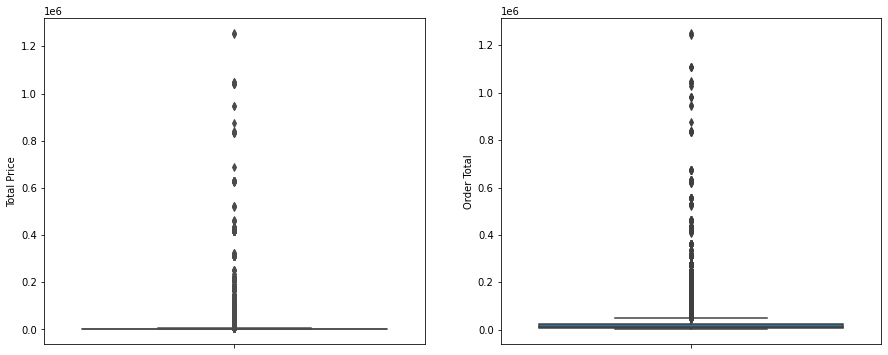

In [ ]:
plt.figure(figsize=(15,6))
plt.subplot(1,2,1)
sns.boxplot(y=mrg["Total Price"], color="red")
plt.subplot(1,2,2)
sns.boxplot(y=mrg["Order Total"])
plt.show()

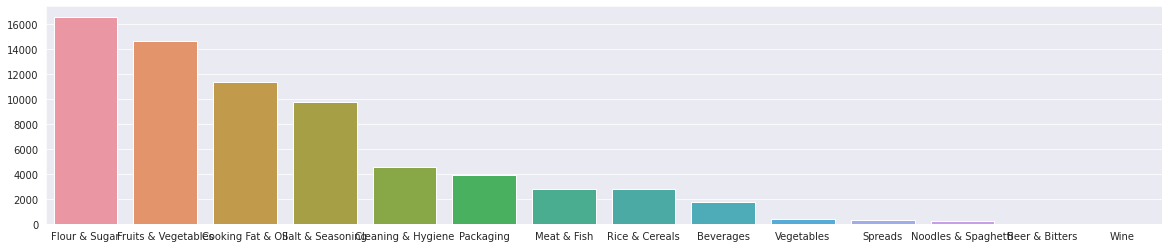

In [ ]:
categories = mrg['Category Name'].value_counts()
sns.set_style("darkgrid")
plt.figure(figsize=(20,4))
sns.barplot(x=categories.index, y=categories.values)
plt.show()

In [ ]:
from sklearn.preprocessing import LabelEncoder
le=LabelEncoder()

mrg['Category Name']=le.fit_transform(mrg['Category Name'])
mrg

,Customer ID,Last Used Platform,Is Blocked,Created At,Language,Outstanding Amount,Loyalty Points,Number of employees,Upload restuarant location,Order_ID,Order Status,Category Name,SKU,Customization Group,Customization Option,Quantity,Unit Price,Cost Price,Total Cost Price,Total Price,Order Total,Sub Total,Tax,Delivery Charge,Tip_x,Discount_x,Remaining Balance,Payment Method,Additional Charge,Taxable Amount,Transaction ID,Currency Symbol,Transaction Status,Promo Code,Merchant ID,Store Name,Pickup Address,Description,Distance (in km),Order Time,...,Redeemed Loyalty Points,Consumed Loyalty Points,Cancellation Reason,Flat Discount,Checkout Template Name,Checkout Template Value,Task_ID,Relationship,Team_Name,Task_Type,Notes,Agent_ID,Agent_Name,Distance(m),Total_Time_Taken(min),Pick_up_From,Start_Before,Complete_Before,Completion_Time,Task_Status,Ref_Images,Rating,Review,Latitude,Longitude,Tags,Promo_Applied,Custom_Template_ID,Task_Details_QTY,Task_Details_AMOUNT,Special_Instructions,Tip_y,Delivery_Charges,Discount_y,Subtotal,Payment_Type,Task_Category,Earning,Pricing,Unnamed: 34
0,3365019,WEB,0,2021-04-21T07:15:56.000Z,en,0,68,NaN,NaN,11155410,COMPLETED,3,KKCO0620,NaN,NaN,1,4320,4270.0,4270.0,4320,6470.0,6516,-,-,-,-,0,CASH,-,-,0,KSh,NaN,NaN,893555,Topup Mama,"Kilimani, Nairobi, Kenya",NaN,20.09,2022-02-11T20:02:56.000Z,...,46,65,NaN,0,-,-,365714001,3.657140e+29,Default Team,Delivery,NaN,1092535,Dominic Kipkemoi,0,13.35,Topup Mama,11 Feb 2022 08:00:32 pm,12 Feb 2022 08:00:00 am,12 Feb 2022 07:38:44 am,Completed,-,0,-,-1.149616,36.947408,NaN,-,Order_Details,1,KSh 4320.00,-,-,-,-,-,-,-,0,0,NaN
1,3365019,WEB,0,2021-04-21T07:15:56.000Z,en,0,68,NaN,NaN,11155410,COMPLETED,3,KKCO0620,NaN,NaN,1,4320,4270.0,4270.0,4320,6470.0,6516,-,-,-,-,0,CASH,-,-,0,KSh,NaN,NaN,893555,Topup Mama,"Kilimani, Nairobi, Kenya",NaN,20.09,2022-02-11T20:02:56.000Z,...,46,65,NaN,0,-,-,365714001,3.657140e+29,Default Team,Delivery,NaN,1092535,Dominic Kipkemoi,0,13.35,Topup Mama,11 Feb 2022 08:00:32 pm,12 Feb 2022 08:00:00 am,12 Feb 2022 07:38:44 am,Completed,-,0,-,-1.149616,36.947408,NaN,-,Order_Details,1,KSh 1670.00,-,-,-,-,-,-,-,0,0,NaN
2,3365019,WEB,0,2021-04-21T07:15:56.000Z,en,0,68,NaN,NaN,11155410,COMPLETED,3,KKCO0620,NaN,NaN,1,4320,4270.0,4270.0,4320,6470.0,6516,-,-,-,-,0,CASH,-,-,0,KSh,NaN,NaN,893555,Topup Mama,"Kilimani, Nairobi, Kenya",NaN,20.09,2022-02-11T20:02:56.000Z,...,46,65,NaN,0,-,-,365714001,3.657140e+29,Default Team,Delivery,NaN,1092535,Dominic Kipkemoi,0,13.35,Topup Mama,11 Feb 2022 08:00:32 pm,12 Feb 2022 08:00:00 am,12 Feb 2022 07:38:44 am,Completed,-,0,-,-1.149616,36.947408,NaN,-,Order_Details,2,KSh 526.00,-,KSh 0.00,KSh 0.00,KSh 46.00,6470,CASH,-,0,0,NaN
3,3365019,WEB,0,2021-04-21T07:15:56.000Z,en,0,68,NaN,NaN,11155410,COMPLETED,4,KKFS0222,NaN,NaN,1,1670,1630.0,1630.0,1670,6470.0,6516,-,-,-,-,0,CASH,-,-,0,KSh,NaN,NaN,893555,Topup Mama,"Kilimani, Nairobi, Kenya",NaN,20.09,2022-02-11T20:02:56.000Z,...,46,65,NaN,0,-,-,365714001,3.657140e+29,Default Team,Delivery,NaN,1092535,Dominic Kipkemoi,0,13.35,Topup Mama,11 Feb 2022 08:00:32 pm,12 Feb 2022 08:00:00 am,12 Feb 2022 07:38:44 am,Completed,-,0,-,-1.149616,36.947408,NaN,-,Order_Details,1,KSh 4320.00,-,-,-,-,-,-,-,0,0,NaN
4,3365019,WEB,0,2021-04-21T07:15:56.000Z,en,0,68,NaN,NaN,11155410,COMPLETED,4,KKFS0222,NaN,NaN,1,1670,1630.0,1630.0,1670,6470.0,6516,-,-,-,-,0,CASH,-,-,0,KSh,NaN,NaN,893555,Topup Mama,"Kilimani, Nairobi, Kenya",NaN,20.09,2022-02-11T20:02:56.000Z,...,46,65,NaN,0,-,-,365714001,3.657140e+29,Default Team,Delivery,NaN,1092535,Dominic Kipkemoi,0,13.35,Topup Mama,11 Feb 2022 08:00:32 pm,12 Feb 2022 08:00:00 am,12 Feb 2022 07:38:44 am,Completed,-,0,-,-1.149616,36.947408,NaN,-,Order_Details,1,KSh 1670.00,-,-,-,-,-,-,-,0,0,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...

In [ ]:
mrg=mrg.fillna(0)
mrg.isna().sum()

Customer ID           0
Last Used Platform    0
Is Blocked            0
Created At            0
Language              0
                     ..
Payment_Type          0
Task_Category         0
Earning               0
Pricing               0
Unnamed: 34           0
Length: 89, dtype: int64

In [ ]:
df_df=mrg[['Category Name','Longitude','Loyalty Points','Order Total']]
# df_df.Latitude=pd.to_numeric(df_df.Latitude)

In [ ]:
!pip install KMeans
!pip3 install KMeans

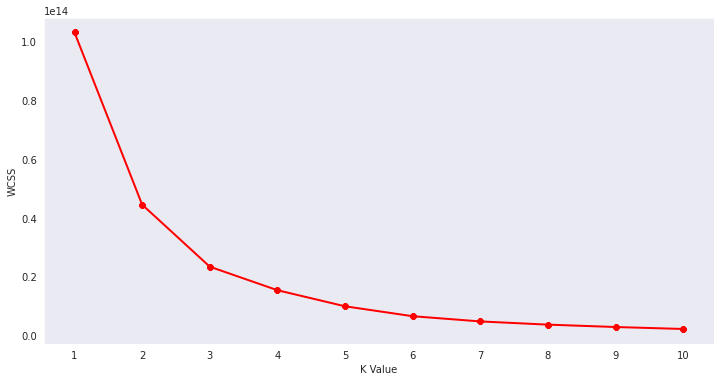

In [ ]:
from sklearn.cluster import KMeans
from sklearn.cluster import KMeans


wcss = []
for k in range(1,11):
    kmeans = KMeans(n_clusters=k, init="k-means++")
    kmeans.fit(df_df.iloc[:,0:])
    wcss.append(kmeans.inertia_)
plt.figure(figsize=(12,6))    
plt.grid()
plt.plot(range(1,11),wcss, linewidth=2, color="red", marker ="8")
plt.xlabel("K Value")
plt.xticks(np.arange(1,11,1))
plt.ylabel("WCSS")
plt.show()

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """


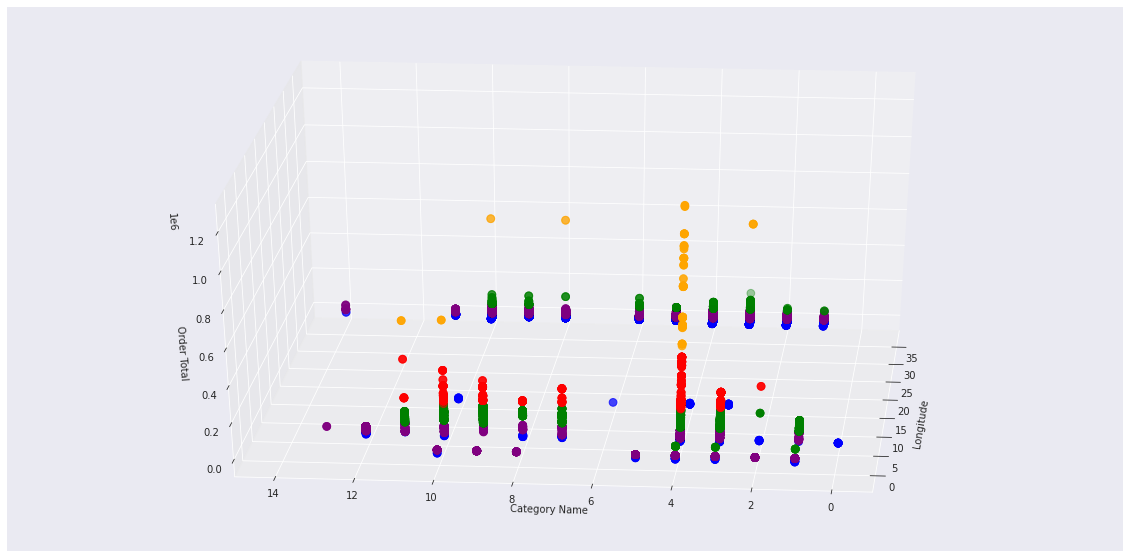

In [ ]:
#grouping customers based on Longitude,Category item bought and Order total
#you can try other means
km = KMeans(n_clusters=5)
clusters = km.fit_predict(df_df.iloc[:,1:])
df_df["label"] = clusters

from mpl_toolkits.mplot3d import Axes3D
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
 
fig = plt.figure(figsize=(20,10))
ax = fig.add_subplot(111, projection='3d')
ax.scatter(df_df.Longitude[df_df.label == 0], mrg['Category Name'][df_df.label == 0], df_df["Order Total"][df_df.label == 0], c='blue', s=60)
ax.scatter(df_df.Longitude[df_df.label == 1], mrg['Category Name'][df_df.label == 1], df_df["Order Total"][df_df.label == 1], c='red', s=60)
ax.scatter(df_df.Longitude[df_df.label == 2], mrg['Category Name'][df_df.label == 2], df_df["Order Total"][df_df.label == 2], c='green', s=60)
ax.scatter(df_df.Longitude[df_df.label == 3], mrg['Category Name'][df_df.label == 3], df_df["Order Total"][df_df.label == 3], c='orange', s=60)
ax.scatter(df_df.Longitude[df_df.label == 4], mrg['Category Name'][df_df.label == 4], df_df["Order Total"][df_df.label == 4], c='purple', s=60)
ax.view_init(30, 185)
plt.xlabel("Longitude")
plt.ylabel("Category Name")
ax.set_zlabel('Order Total')
plt.show()

**Product Recomendations**

In [ ]:
df_prod=mrg[['Customer ID','Category Name','Ratings','Loyalty Points','Order_ID']]

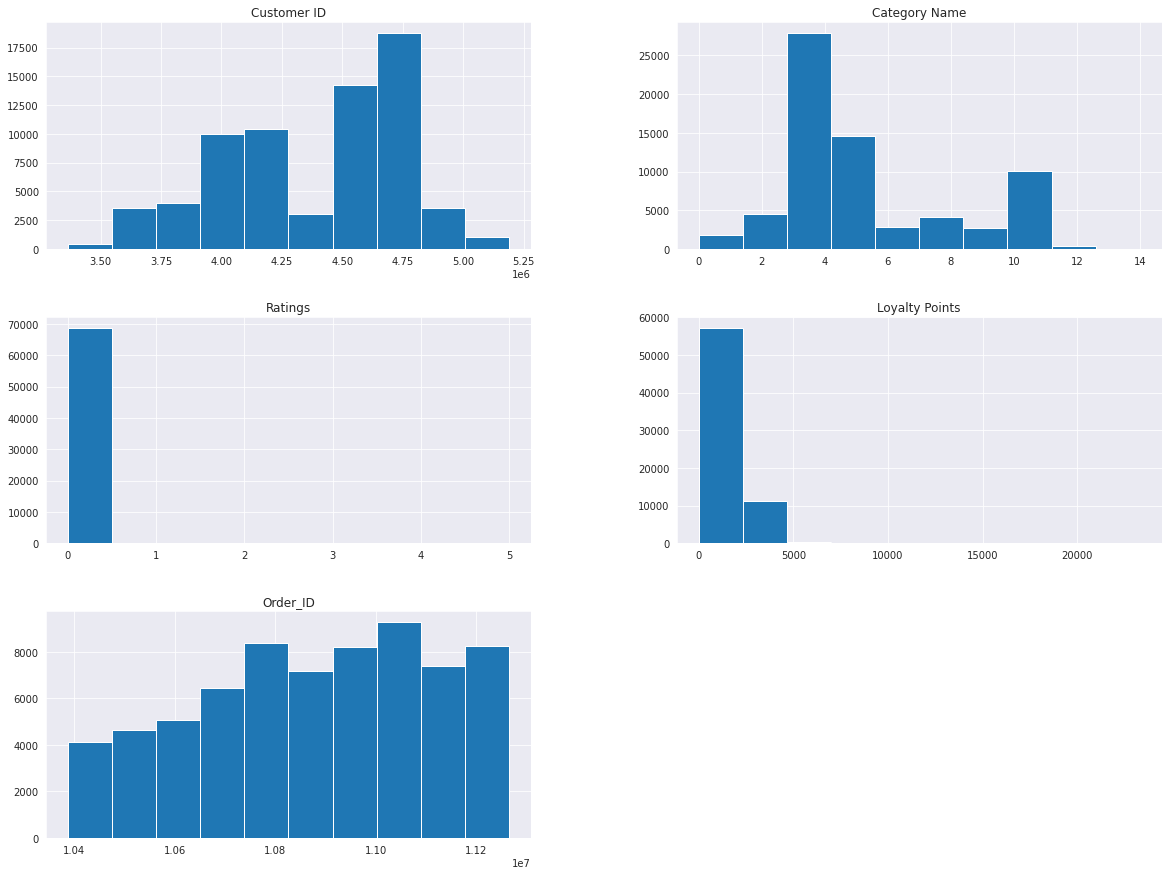

In [ ]:
df_prod.hist(figsize=(20, 15))
plt.show()

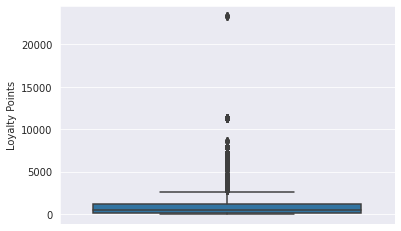

In [ ]:
sns.boxplot(y='Loyalty Points',data=df_prod)

In [ ]:
counts=df_prod['Customer ID'].value_counts()
df1=df_prod[df_prod['Customer ID'].isin(counts[counts>=50].index)]
df1.head(30)

,Customer ID,Category Name,Ratings,Loyalty Points,Order_ID
10,3365770,3,0.0,55,11253217
11,3365770,3,0.0,55,11253217
12,3365770,3,0.0,55,11253217
13,3365770,6,0.0,55,11253217
14,3365770,6,0.0,55,11253217
15,3365770,6,0.0,55,11253217
16,3365770,10,0.0,55,11253217
17,3365770,10,0.0,55,11253217
18,3365770,10,0.0,55,11253217
19,3365770,4,0.0,55,11216794


In [ ]:
df1.shape

(62099, 5)

In [ ]:
products_df = pd.DataFrame(df1.groupby('Order_ID')['Loyalty Points'].mean())
products_df['product_royaltypoints_counts'] = pd.DataFrame(df1.groupby('Order_ID')['Loyalty Points'].count())
products_df.head()

,Loyalty Points,product_royaltypoints_counts
Order_ID,,
10387273,1037.0,9
10387712,1290.0,9
10406885,1031.0,49
10407578,1031.0,49
10408346,512.0,25


In [ ]:
products_df.sort_values('Loyalty Points', ascending=False).head()

,Loyalty Points,product_royaltypoints_counts
Order_ID,,
10542975,2892.0,16
10502956,2892.0,16
11137928,2892.0,16
10636234,2892.0,16
10971785,2892.0,16


In [ ]:
products_df.sort_values('product_royaltypoints_counts', ascending=False).head()

,Loyalty Points,product_royaltypoints_counts
Order_ID,,
11197785,2793.0,1296
11118329,898.0,1156
10806900,204.0,1089
10642619,898.0,1089
10942771,204.0,961


**Popularity based filtering based on Cuatomer's royalty points**

In [ ]:
Cust_df = pd.DataFrame(df1.groupby('Customer ID')['Loyalty Points'].mean())
Cust_df['customer_royaltypnts_counts'] = pd.DataFrame(df1.groupby('Customer ID')['Loyalty Points'].count())
Cust_df.head()

,Loyalty Points,customer_royaltypnts_counts
Customer ID,,
3365770,55.0,164
3378262,326.0,80
3385533,113.0,94
3553157,158.0,100
3636098,115.0,1243


In [ ]:
Cust_df.sort_values('Loyalty Points', ascending=False).head()

,Loyalty Points,customer_royaltypnts_counts
Customer ID,,
4547057,2892.0,241
4488769,2840.0,225
4696213,2793.0,9994
4401027,2528.0,178
4068761,2451.0,410


In [ ]:
Cust_df.sort_values('customer_royaltypnts_counts', ascending=False).head()

,Loyalty Points,customer_royaltypnts_counts
Customer ID,,
4696213,2793.0,9994
4221486,204.0,3112
4669823,965.0,2540
4574066,898.0,2415
4259482,309.0,1305


**Collaborative based filtering and get the scores for different models**

In [ ]:
!pip install scikit-surprise

     |████████████████████████████████| 11.8 MB 20.3 MB/s 
  Created wheel for scikit-surprise: filename=scikit_surprise-1.1.1-cp37-cp37m-linux_x86_64.whl size=1630059 sha256=927f726a6c493877390c89311e5f9eef580ddadc45ff58d1c24979bd5ba81a60
  Stored in directory: /root/.cache/pip/wheels/76/44/74/b498c42be47b2406bd27994e16c5188e337c657025ab400c1c
Successfully built scikit-surprise


In [ ]:

%matplotlib inline
import numpy as np
import pandas as pd
from matplotlib import pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')
from sklearn import metrics
from surprise import Reader
from surprise import SVD
from surprise import Dataset
from surprise.model_selection import cross_validate
from surprise.model_selection import train_test_split # # Import Surprise package's data splitting function
from surprise import accuracy
from surprise.model_selection import GridSearchCV
from surprise import KNNBasic
from surprise import KNNWithMeans
reader = Reader(rating_scale=(0.5,5))

data = Dataset.load_from_df(df1[['Customer ID','Loyalty Points','Order_ID']],reader)

# Use the famous SVD algorithm.
svd = SVD()

# Run 5-fold cross-validation and print results.

cross_validate(svd, data, measures=['RMSE', 'MAE'], cv=5, verbose=True)

Evaluating RMSE, MAE of algorithm SVD on 5 split(s).

                  Fold 1  Fold 2  Fold 3  Fold 4  Fold 5  Mean    Std     
RMSE (testset)    10887990.254710887431.635810884472.270410884922.900510884184.470410885800.30631587.5488
MAE (testset)     10885487.473010884931.018010881946.862810882432.465010881696.284410883298.82061587.4981
Fit time          5.11    7.32    7.86    4.33    2.84    5.49    1.87    
Test time         0.65    0.24    0.18    0.09    0.11    0.25    0.21    


{'fit_time': (5.114084243774414,
  7.317057132720947,
  7.856398344039917,
  4.329774618148804,
  2.839067220687866),
 'test_mae': array([10885487.47302737, 10884931.01795491, 10881946.86280193,
        10882432.46497585, 10881696.28440293]),
 'test_rmse': array([10887990.2546979 , 10887431.63576457, 10884472.27035975,
        10884922.90047023, 10884184.47035105]),
 'test_time': (0.6510472297668457,
  0.24161458015441895,
  0.17759251594543457,
  0.09044027328491211,
  0.10927963256835938)}

In [ ]:
# Split the data into 70% / 30%
trainset, testset = train_test_split(data, test_size=.30)

# Run SVD algorithm
## Singular Value Decomposition
svd=SVD()

#Build the model
svd.fit(trainset)
predictions=svd.test(testset)

# Compute errors

accuracy.rmse(predictions)
accuracy.mae(predictions)

RMSE: 10884470.3203
MAE:  10881970.0138


10881970.013794955

In [ ]:
#Define customerid and Orderid in the string format as required in order to predict the recommedations

custid=str(4547057)
ordid=str(11253217)

# Get predictions

pred=svd.predict(custid, ordid, r_ui=4, verbose=True)

user: 4547057    item: 11253217   r_ui = 4.00   est = 5.00   {'was_impossible': False}


In [ ]:
param_grid = {
    "n_epochs": [5, 10],
    "lr_all": [0.002, 0.005],
    "reg_all": [0.4, 0.6]
}
gs = GridSearchCV(SVD, param_grid, measures=["rmse", "mae"], cv=3)

gs.fit(data)

print(gs.best_score)
print(gs.best_params)

{'rmse': 10885800.363539798, 'mae': 10883298.88147196}
{'rmse': {'n_epochs': 5, 'lr_all': 0.002, 'reg_all': 0.4}, 'mae': {'n_epochs': 5, 'lr_all': 0.002, 'reg_all': 0.4}}


In [ ]:
# GridSearch with KNNbasic

param_grid = {'min_k':[2,3,4], 'k':[5,10,20] }
gs = GridSearchCV(KNNBasic, param_grid, measures=["rmse", "mae"], cv=3)

gs.fit(data)

print(gs.best_score)
print(gs.best_params)

Computing the msd similarity matrix...
Done computing similarity matrix.
Computing the msd similarity matrix...
Done computing similarity matrix.
Computing the msd similarity matrix...
Done computing similarity matrix.
Computing the msd similarity matrix...
Done computing similarity matrix.
Computing the msd similarity matrix...
Done computing similarity matrix.
Computing the msd similarity matrix...
Done computing similarity matrix.
Computing the msd similarity matrix...
Done computing similarity matrix.
Computing the msd similarity matrix...
Done computing similarity matrix.
Computing the msd similarity matrix...
Done computing similarity matrix.
Computing the msd similarity matrix...
Done computing similarity matrix.
Computing the msd similarity matrix...
Done computing similarity matrix.
Computing the msd similarity matrix...
Done computing similarity matrix.
Computing the msd similarity matrix...
Done computing similarity matrix.
Computing the msd similarity matrix...
Done computi